In [47]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [48]:
from sklearn.datasets import load_iris
from termcolor import colored

In [49]:
iris = load_iris()
print(colored('Dataset Type :', 'blue'),type(iris))
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data

Dataset Type : <class 'sklearn.utils._bunch.Bunch'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [50]:
df = pd.read_csv(r'C:\Users\CihangirA\Desktop\CihangirA_Codes\weight-height.csv')

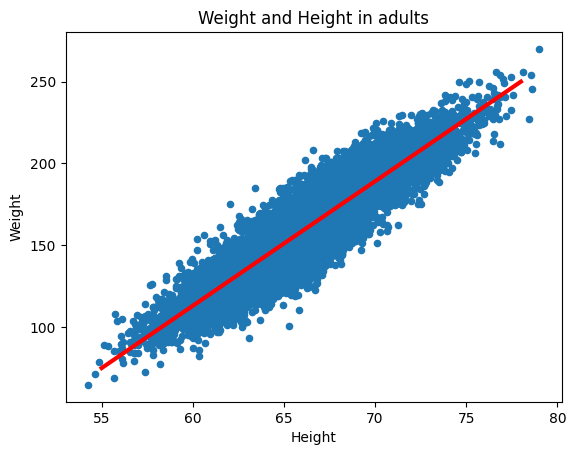

In [51]:
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults');
plt.plot([55,78], [75, 250], color='red', linewidth=3); # were plotting the red line BY HAND with fixed values

In [52]:
def line(x, w=0, b=0):
    return x*w+b

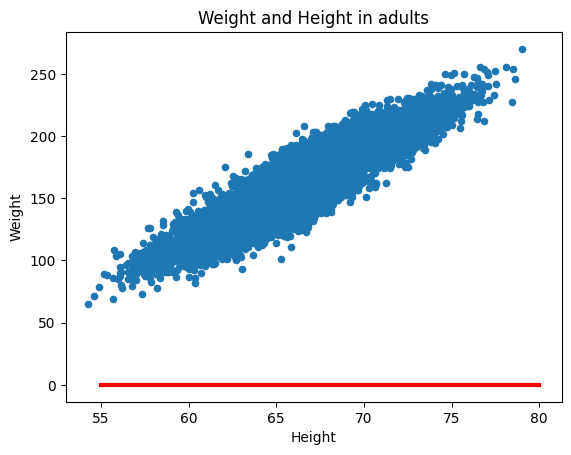

In [53]:
x = np.linspace(55,80,100)
y_hat = line(x, w=0, b=0)

df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults');
plt.plot(x, y_hat, color='red', linewidth=3);

In [54]:
def MSE(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [55]:
X = df[['Height']].values
y_true = df['Weight'].values
y_pred = line(X)

In [56]:
print(colored('Mean Squared Error :', 'red'), MSE(y_true, y_pred.ravel())) # same result but faster

Mean Squared Error : 27093.83757456157


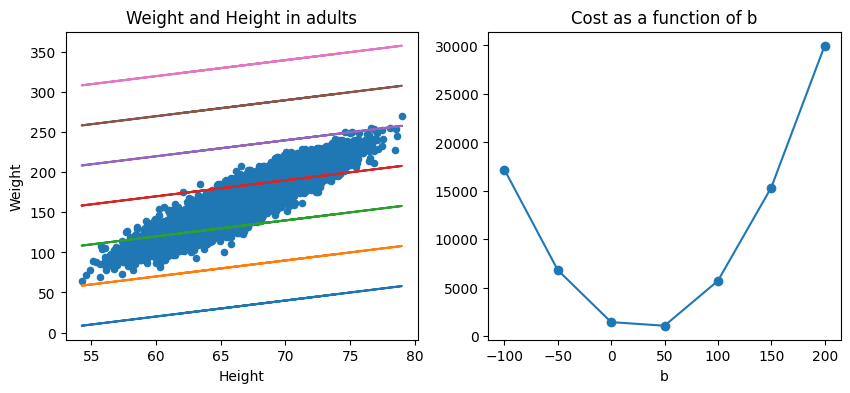

In [68]:
plt.figure(figsize=(10,4))
axl = plt.subplot(121)
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults', ax=axl);
bbs = np.array([-100, -50, 0, 50, 100,150,200])
mses = []
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = MSE(y_true, y_pred.ravel())
    mses.append(mse)
    plt.plot(X, y_pred);
ax2 = plt.subplot(122);
plt.plot(bbs, mses, 'o-');
plt.title('Cost as a function of b');
plt.xlabel('b');

**Linear Regression with KERAS**

In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [70]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 


Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Epoch 1/40


c:\Users\CihangirA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


313/313 [==============================] - 0s 679us/step - loss: 1446.3589
Epoch 2/40
313/313 [==============================] - 0s 617us/step - loss: 556.0176
Epoch 3/40
313/313 [==============================] - 0s 633us/step - loss: 536.0203
Epoch 4/40
313/313 [==============================] - 0s 627us/step - loss: 502.5278
Epoch 5/40
313/313 [==============================] - 0s 627us/step - loss: 447.0875
Epoch 6/40
313/313 [==============================] - 0s 623us/step - loss: 411.7711
Epoch 7/40
313/313 [==============================] - 0s 636us/step - loss: 376.3841
Epoch 8/40
313/313 [==============================] - 0s 643us/step - loss: 345.5659
Epoch 9/40
313/313 [==============================] - 0s 648us/step - loss: 325.8153
Epoch 10/40
313/313 [==============================] - 0s 654us/step - loss: 291.4769
Epoch 11/40
313/313 [==============================] - 0s 637us/step - loss: 262.1791
Epoch 12/40
313/313 [==============================] - 0s 641us/step - lo

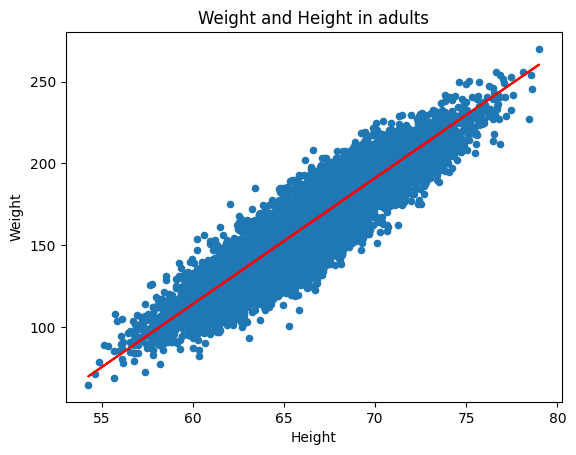

In [72]:
model.compile(Adam(lr=0.8), 'mean_squared_error')
model.fit(X, y_true, epochs=40)
y_pred = model.predict(X)
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults');
plt.plot(X, y_pred, color='red')

In [76]:
W,  B = model.get_weights()
print(colored('W :', 'blue'), W)
print(colored('B :', 'blue'), B)

W : [[7.7034616]]
B : [-348.1365]
